In [57]:
!pip install git+https://github.com/yuanz271/vlgpax.git

  Cloning https://github.com/yuanz271/vlgpax.git to /tmp/pip-req-build-9sgnn8v0
  Running command git clone --filter=blob:none --quiet https://github.com/yuanz271/vlgpax.git /tmp/pip-req-build-9sgnn8v0
  Resolved https://github.com/yuanz271/vlgpax.git to commit 0a4af5f19f20ed5a6b3c775887c127220bfbb185
  Preparing metadata (setup.py) ... done


In [58]:
import math
import jax.random
import numpy as np
from matplotlib import pyplot as plt
from vlgpax.model import Session
from vlgpax.kernel import RBF, RFF
from vlgpax import vi

In [59]:
random_seed = 0

Condition: turning right

In [60]:
random_seed = 0
#when turning right
np.random.seed(random_seed)
# %% Generate 2D sine wave latent trajectory
dt = 2 * math.pi * 2e-3  # stepsize
mini_T = 500 # length 10000
mini_t = np.arange(mini_T * dt, step=dt)  # time points
#5000 time points each with a length of dt
#z = np.column_stack([np.cos(0.5*t+1), np.sin(0.5*t+5)])
z = np.column_stack([0.06*(mini_t)**2, -0.06*(mini_t-3)**2+0.54])

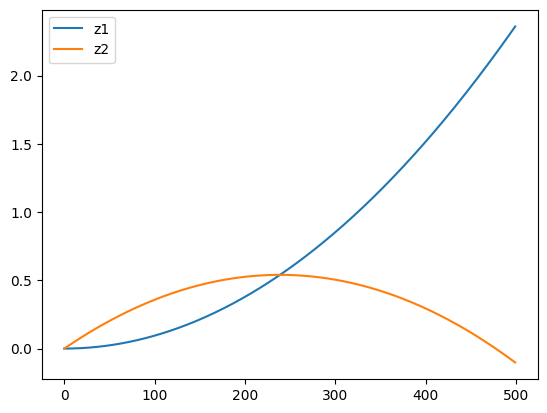

In [61]:
plt.plot(z)
plt.gca().legend(('z1','z2'))
plt.show()

Condition: turning left

In [62]:
#when turning left
np.random.seed(random_seed)
# %% Generate 2D sine wave latent trajectory
dt = 2 * math.pi * 2e-3  # stepsize
mini_T = 500 # length 10000
mini_t = np.arange(mini_T * dt, step=dt)  # time points
#5000 time points each with a length of dt
#z = np.column_stack([np.cos(0.5*t+1), np.sin(0.5*t+5)])
z_2 = np.column_stack([-0.06*(mini_t-3)**2+0.54, 0.06*(mini_t)**2])

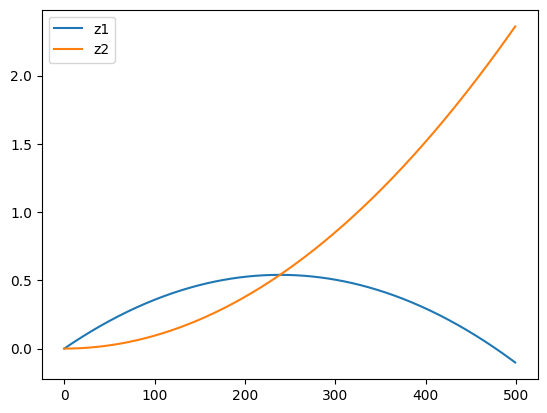

In [63]:
plt.plot(z_2)
plt.gca().legend(('z1','z2'))
plt.show()

In [64]:
right_lst = [0, 3, 5, 6, 7]

In [65]:
for i in range(10):
  if i == 0:
    new_z = z
  elif i in right_lst:
    new_z = np.vstack((new_z, z))
  else:
    new_z = np.vstack((new_z, z_2))
new_z.shape

(5000, 2)

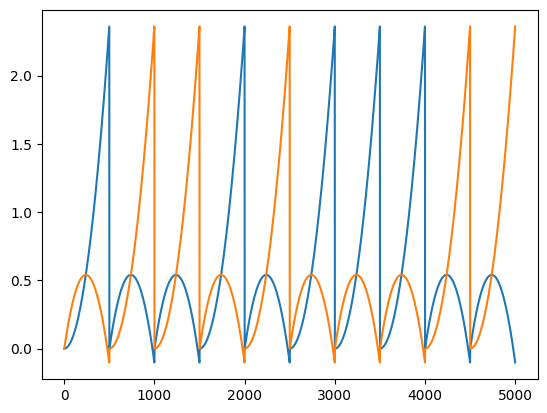

In [66]:
plt.plot(new_z)

In [67]:
T = 5000 #5000
N = 10  # 10D number of cells
x = np.column_stack([new_z, np.ones(T)])  # Append a constant column for bias
#x is a matrix that contain z1, z2 columns, and a bias column
#C is similar to A (but it is a sort of transpose of A)
C = np.random.randn(x.shape[-1],
                    N)  # Sample the loading matrix from Gaussian
#C has a dimension of 3(z1, z2, bias) * 10
C[-1, :] = -1.5  # less spikes per bin
#r is similar to big lambda n * T, our r is T * n
r = np.exp(x @ C)  # firing rate
y = np.random.poisson(r)  # spikes

In [68]:
spike_array = y.T

Plot 50 100ms time bins

In [69]:
sum_lst = []
for i in range(50):
  spk = np.sum(spike_array[:,100*i:100*(i+1)])
  #print(spike_array[:,10*i:10*(i+1)])
  sum_lst.append(spk)
len(sum_lst)

50

In [70]:
import pandas as pd

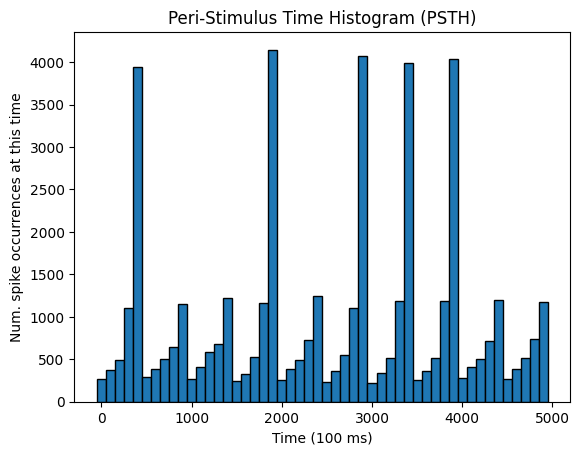

In [71]:
plt.bar(np.arange(0, 5000, 100), sum_lst, width=100.0, edgecolor='black')
plt.title('Peri-Stimulus Time Histogram (PSTH)')
plt.xlabel('Time (100 ms)')
plt.ylabel('Num. spike occurrences at this time')
plt.show()

In [72]:
psth_df = pd.DataFrame()
psth_df['time'] = np.arange(0, 5000, 100)
psth_df['count'] = sum_lst
psth_df = psth_df.set_index('time')
#psth_df

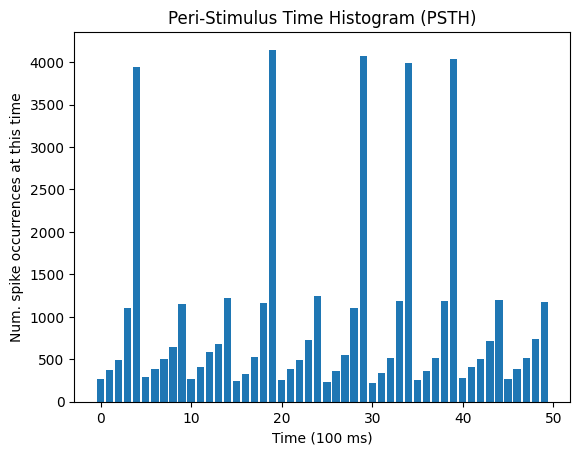

In [73]:
fig, ax = plt.subplots()

# add shading for stimulus duration)
# Do this first, so it's drawn "under" the PSTH
#ax.axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')

# Draw the PSTH
# ax.bar(np.arange(spike_array.shape[0]),
#         np.sum(y, 0)
#        )
ax.bar(np.arange(50),
        sum_lst
       )
# ax.hist(spike_array,
#         100
#        )

# Make pretty
ax.set_title('Peri-Stimulus Time Histogram (PSTH)')
ax.set_xlabel('Time (100 ms)')
ax.set_ylabel('Num. spike occurrences at this time')
#labels = np.arange(0, 5000, 100)
#plt.xticks(sum_lst, labels)#, rotation=45)
plt.show()

individual cell across conditions, avg number of spike over that time, avg go right and avg go left, 2-3 cells plot like that, avg responses for individual cells, movement on set, stimulus on set, time up to they move, the time immediately after the stimulus happen, avg wiggles for each condition, is there signal on the cell??, if there is no signal, then probably the wrong the data, in project 1 writeup, diff types of events

In [74]:
def plot_cell(cell_number):
  rand_cell = list(y[:,cell_number-1])
  right_avg_lst = []
  left_avg_lst = []
  for i in range(10):
    if i in right_lst:
      right_avg_lst.append(rand_cell[i*500:(i+1)*500])
    else:
      left_avg_lst.append(rand_cell[i*500:(i+1)*500])

  average_right = [sum(sub_list) / len(sub_list) for sub_list in zip(*right_avg_lst)]
  average_left = [sum(sub_list) / len(sub_list) for sub_list in zip(*left_avg_lst)]

  avg_col = np.column_stack([np.array(average_right), np.array(average_left)])
  plt.plot(avg_col)
  plt.gca().legend(('right','left'))
  plt.xlabel('Time (1 ms)')
  plt.ylabel('Averge Num. spike occurrences at this time')
  plt.title('Individual cell across conditions (cell ' + str(cell_number) + ')')
  plt.show()

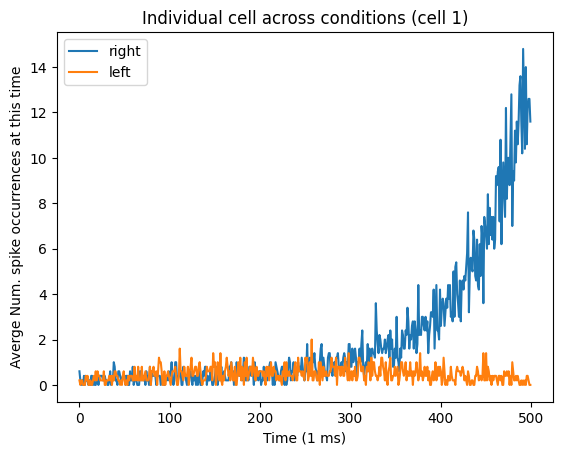

In [75]:
plot_cell(1)

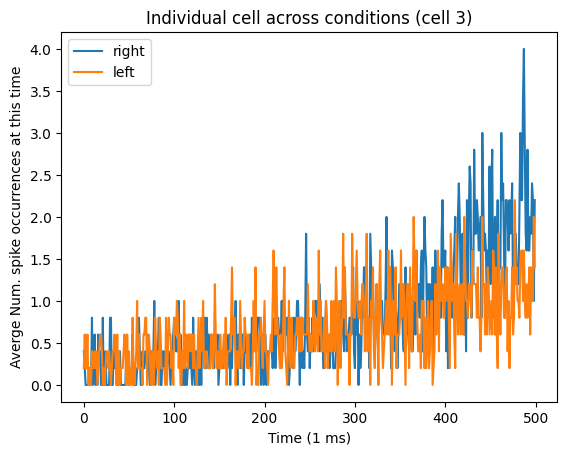

In [76]:
plot_cell(3)

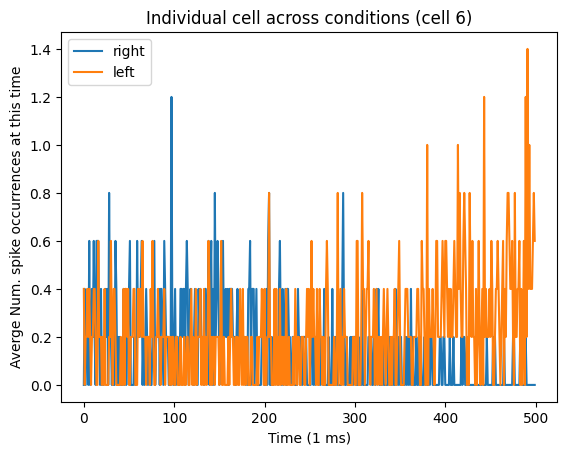

In [77]:
plot_cell(6)

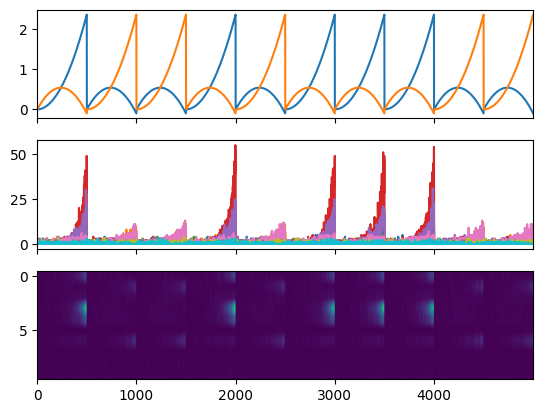

In [78]:
# %% Draw all
fig, ax = plt.subplots(3, 1, sharex='all')
ax[0].plot(new_z)  # latent
ax[1].plot(y)  # spikes
ax[2].imshow(y.T, aspect='auto')  # show spikes in heatmap

In [79]:
# %% Setup inference
ys = np.reshape(y,
                (10, T // 10, -1))  # Split the spike train into 10 trials
session = Session(dt)  # Construct a session.
# Session is the top level container of data. Two arguments, binsize and unit of time, are required at construction.
for i, y in enumerate(ys):
  session.add_trial(i + 1, y=y)  # Add trials to the session.
# Trial is the basic unit of observation, regressor, latent factors and etc.
# tid and y are only required argument to construct a trial.
# tid is an unique identifier of the trial,
# y is the spike train,
# x is an optional argument that represents the design matrix of
# such as spike history, stimuli, behavior, neuron coupling and etc.
# An constant column for bias is generated automatically if x is absent

In [80]:
 # %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

# Session supports direct access to the fields of trial. It concatenate the requested field of all the trials.
# After fitting, the following fields will be filled in each trial
# z: psoterior mean of latent factors, (T, factor)
# v: posterior variance of latent factors, (T, factor)
# w: needed to construct posterior covariance
# Note that the fit doesn't keep posterior covariance of each factor
# to save space, but they can be reconstructed.

#ax[3].plot(session.z)  # Draw the result

Initializing
Initialized
EM Iteration 1, 	Loss = -8.8972, 	M step: 1.57s, 	E step: 6.09s
EM Iteration 2, 	Loss = -8.9551, 	M step: 0.52s, 	E step: 2.72s
EM Iteration 3, 	Loss = -8.9562, 	M step: 0.49s, 	E step: 2.28s
EM Iteration 4, 	Loss = -8.9568, 	M step: 0.39s, 	E step: 2.80s
EM Iteration 5, 	Loss = -8.9574, 	M step: 0.67s, 	E step: 3.16s
EM Iteration 6, 	Loss = -8.9580, 	M step: 0.49s, 	E step: 2.89s
EM Iteration 7, 	Loss = -8.9585, 	M step: 0.47s, 	E step: 2.22s
EM Iteration 8, 	Loss = -8.9591, 	M step: 0.24s, 	E step: 2.85s
EM Iteration 9, 	Loss = -8.9596, 	M step: 0.19s, 	E step: 3.86s
EM Iteration 10, 	Loss = -8.9600, 	M step: 0.48s, 	E step: 3.18s
EM Iteration 11, 	Loss = -8.9605, 	M step: 0.17s, 	E step: 1.26s
EM Iteration 12, 	Loss = -8.9610, 	M step: 0.16s, 	E step: 1.32s
EM Iteration 13, 	Loss = -8.9614, 	M step: 0.15s, 	E step: 1.23s
EM Iteration 14, 	Loss = -8.9618, 	M step: 0.14s, 	E step: 1.32s
EM Iteration 15, 	Loss = -8.9622, 	M step: 0.14s, 	E step: 1.28s
EM Iterat

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


Trial 3, 	Loss = -3.1032
Trial 4, 	Loss = -15.9549
Trial 5, 	Loss = -3.4188
Trial 6, 	Loss = -14.9519
Trial 7, 	Loss = -15.1495
Trial 8, 	Loss = -15.1600
Trial 9, 	Loss = -3.2559
Trial 10, 	Loss = -3.3193
Finished


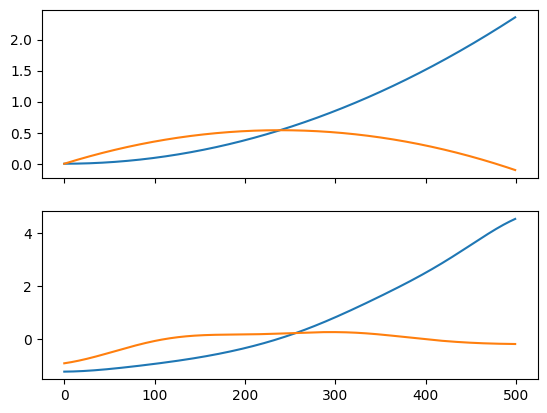

In [81]:
#10 trails turning right
fig, ax = plt.subplots(2, 1, sharex='all')
ax[0].plot(new_z[:500])
ax[1].plot(session.z[:500])

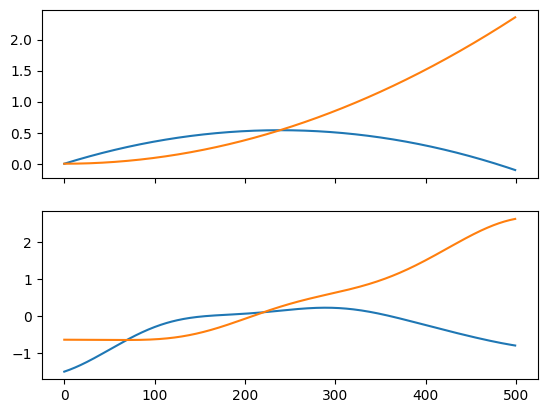

In [82]:
#10 trails turning left
fig, ax = plt.subplots(2, 1, sharex='all')
ax[0].plot(new_z[500:1000])
ax[1].plot(session.z[500:1000])